In [403]:
import pandas as pd
import requests
import seaborn as sns
from bs4 import BeautifulSoup
%matplotlib inline
sns.set_style("whitegrid")
sns.set(font_scale=1.25) 

In [418]:
def get_data(country):
    cwur2016 = requests.get(f'http://cwur.org/2016/{country}.php').content.decode('utf-8')
    cwur2017 = requests.get(f'http://cwur.org/2017/{country}.php').content.decode('utf-8')
    
    df2016 = pd.read_html(cwur2016)[0].set_index('Institution')
    df2017= pd.read_html(cwur2017)[0].set_index('Institution')
    # Remove NUM+ from columns, used for ax-equo results in CWUR rankings
    for i in range(3,11):
        df2016.iloc[:,i]=df2016.iloc[:,i].apply(lambda x: int(str(x).replace('+','')))
        df2017.iloc[:,i]=df2017.iloc[:,i].apply(lambda x: int(str(x).replace('+','')))

    # CWUR started adding Topx% information to world rank column in 2017, extract just the ranks
    df2017['World Rank'] = df2017['World Rank'].apply(lambda x: int(x.split('Top')[0]))

    # We know the country
    del df2017['Location']
    del df2016['Location']
    
    return df2016, df2017

In [419]:
def get_diff(df2016, df2017):
    # 2017 - 2016, drop universities not present in 2017
    df_diff=(df2017-df2016).dropna().copy()
    df_diff.iloc[:,:-1] = -df_diff.iloc[:,:-1] 
    df_diff['rank'] = df2['National Rank']
    return df_diff

In [420]:
def plot_diff(df_diff, country):
    to_plot = df_diff.sort_values('rank').iloc[:,:-1].T
    ax = to_plot.plot.barh(subplots=True, layout=(max(df_diff.shape[0],4), 2), figsize=(10, 20), 
                       sharex=False, sharey=True, grid=True, legend=False);
    x=ax[0][0]
    y = x.get_figure()
    y.suptitle(f'CWUR difference 2016-2017 per institution in {country}');
    y

In [422]:
countries_raw = requests.get('http://cwur.org/2017/country.php').content.decode('utf-8')
country_name_data = BeautifulSoup(countries_raw, "lxml").select('body > div > div > div.row > div > p a')
countries_dict = {
    x.text.strip().replace('\xa0', ' ') : x['href'].replace('.php','')
    for x in country_name_data    
}

### Countries to choose from:

In [430]:
print(', '.join(countries_dict.keys()))

Argentina, Australia, Austria, Belgium, Brazil, Bulgaria, Canada, Chile, China, Colombia, Croatia, Cyprus, Czech Republic, Denmark, Egypt, Estonia, Finland, France, Germany, Greece, Hong Kong, Hungary, Iceland, India, Iran, Ireland, Israel, Italy, Japan, Lebanon, Lithuania, Macau, Malaysia, Mexico, Netherlands, New Zealand, Norway, Pakistan, Poland, Portugal, Puerto Rico, Romania, Russia, Saudi Arabia, Serbia, Singapore, Slovak Republic, Slovenia, South Africa, South Korea, Spain, Sweden, Switzerland, Taiwan, Thailand, Turkey, Uganda, United Arab Emirates, United Kingdom, Uruguay, USA


### Country institution chart

In [431]:
country_name = 'Argentina'

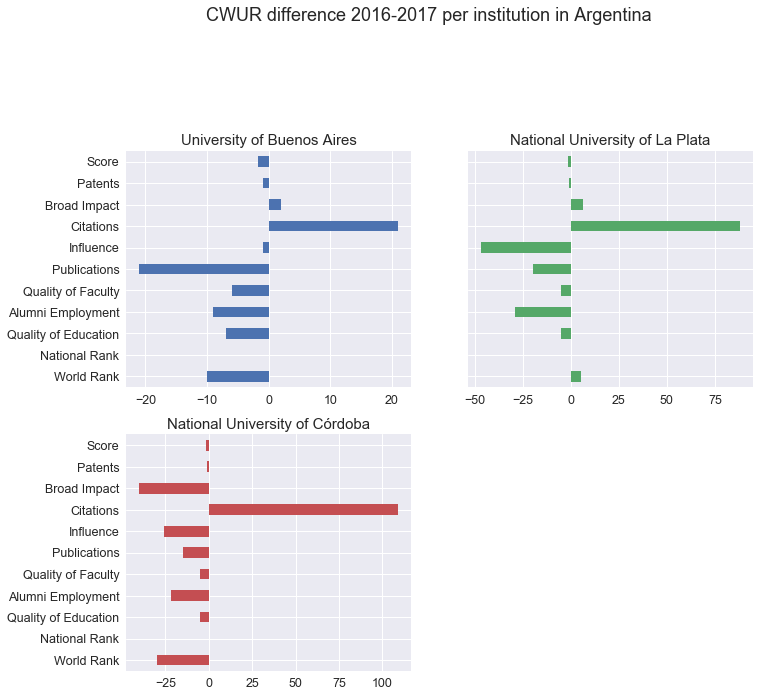

In [432]:
# names and codes from http://cwur.org/2017/country.php
df2016, df2017 = get_data(countries_dict[country_name])
df_diff = get_diff(df2016, df2017)
plot_diff(df_diff, country_name)